# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisempi työttömyysturvamalli.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.5 valittaa paljon)
import warnings
warnings.filterwarnings('ignore')

pop_size=1_0
size1=10_000_000
size2=10_000_000
batch1=1
batch2=1000
deterministic=False
mortality=False

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 65
max_retirementage 70
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
deterministic False

train...
phase 1
use_vecmonitor False
use_callback False
training...
---------------------------------
| explained_variance | -0.00604 |
| fps                | 3187     |
| nupdates           | 1        |
| policy_entropy     | 1.39     |
| policy_loss        | 55.6     |
| total_timesteps    | 0        |
| value_loss         | 1.67e+03 |
---------------------------------
done
phase 2
use_vecmonitor True
use_callback True
init vecmonitor:  tmp/monitor.csv
init resultswriter
training...
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 210.203  |
| explained_variance | 0.144    |
| fps                | 3194    

619884 timesteps mean 208.81330185 out of [223.46411 224.79562 222.56757 218.00813 209.75807 177.60382 221.7894
 216.84853 199.99533 235.5912  238.89124 175.22473 181.10081 222.54152
 224.30139 212.5149  222.01996 209.33388 179.27632 224.05977 210.99876
 177.29723 210.92494 218.0737  173.70769 223.86685 176.97116 173.57878
 227.24835 178.54727 179.43932 222.37799 222.98232 222.7166  225.10779
 174.36005 222.02168 179.3587  221.97726 221.47429 208.44879 214.48715
 231.236   229.87566 226.80931 243.02408 217.8626  173.4693  214.16998
 211.76941 223.06746 180.86649 176.49507 213.12701 214.17554 175.33542
 224.86473 215.94669 202.7437  203.49763 173.6102  212.89714 223.51997
 211.51286 229.05637 179.94171 175.25754 177.86108 229.60721 174.98949
 221.8565  179.64502 224.23155 224.2039  225.78076 235.71368 220.74182
 217.99623 220.64355 230.56378 209.86827 210.95175 176.58585 204.21895
 220.25974 227.12871 208.63454 179.88383 178.38263 236.01634 210.22408
 180.27594 240.51456 208.83372 225.0

824904 timesteps mean 208.06990916 out of [219.73143 206.74554 178.51964 231.08432 183.90208 177.71198 210.57498
 207.21037 224.58502 177.3461  222.38573 209.72662 221.1532  174.2241
 229.57071 209.90453 221.58298 200.43048 225.06111 177.19458 210.37498
 174.94023 215.5421  230.55414 205.51614 239.61961 211.11375 175.4805
 224.82002 220.42802 177.33447 207.01501 224.12033 216.06639 232.90756
 212.01514 233.59915 179.60806 210.11493 211.65764 223.50604 232.02449
 202.69475 230.20142 226.33702 236.75359 222.87277 210.00377 206.7902
 217.60538 220.55728 222.42577 214.78465 176.48132 237.53265 173.70453
 227.75427 225.15965 178.905   230.04668 176.38649 177.27821 174.28906
 219.99069 224.90237 181.79958 199.24976 214.02179 231.87569 236.56625
 221.74171 177.89679 179.71034 201.45348 230.74844 181.19829 222.25606
 183.66544 178.35674 180.00047 237.30518 229.26183 225.80655 216.06859
 178.775   209.71544 230.39008 214.10529 210.4105  215.64613 175.05548
 174.56607 177.805   223.06215 209.804

1032336 timesteps mean 206.64622683 out of [224.61752 221.17937 201.15126 206.97098 237.7149  221.03506 215.9955
 225.6055  178.0728  214.82231 206.55711 181.653   237.22171 208.37624
 221.81764 224.22665 222.55907 229.85234 180.16609 205.97014 209.49374
 220.526   213.33377 232.8746  222.00385 201.4462  175.14384 208.82375
 177.11424 231.72649 176.3449  179.673   181.44838 177.54666 175.22092
 222.38005 214.59045 176.83339 208.98889 180.16554 173.7186  178.13197
 213.53467 179.76976 220.78154 229.3429  176.02647 175.38919 239.33838
 180.27876 178.50647 222.24982 202.13608 205.48325 223.93437 211.2452
 173.95992 176.31216 214.69672 214.61337 200.76732 174.7409  214.68268
 227.32295 223.79688 213.67426 224.41087 221.91498 179.79652 208.29973
 226.90317 206.16219 222.67365 222.79637 213.21284 217.2573  217.3727
 175.91562 175.25948 221.67987 223.16542 229.60747 211.80928 177.6467
 174.17722 179.24033 214.46307 221.44344 211.4267  212.76057 226.21007
 210.1652  173.53029 217.33173 178.044

1239768 timesteps mean 207.72236794000003 out of [238.16681 208.62466 240.85054 210.40083 223.39111 243.54338 176.04065
 221.61482 213.1116  223.16278 207.72037 211.41129 223.21274 223.31209
 216.91354 230.29178 175.33914 216.24973 175.88873 174.53342 220.52998
 177.65475 223.6189  215.92311 205.98924 221.94225 226.02765 179.55261
 217.99033 229.70813 178.03908 180.68813 217.50049 240.37662 236.42674
 223.89018 234.145   201.70767 217.55357 228.0308  219.60893 175.08493
 219.0896  214.81332 176.57297 222.03795 224.5074  207.1762  214.3235
 216.09193 221.57277 224.80167 231.76347 176.94743 213.51819 222.72726
 224.07237 208.60832 223.79083 236.83052 228.73859 228.93149 176.045
 226.06018 219.98778 216.04532 230.1421  223.4231  207.00113 210.04265
 216.70058 201.26277 176.76068 180.86684 241.17125 208.97168 219.79012
 209.67152 220.56958 210.53342 219.34207 209.02785 222.2286  224.40271
 221.79645 176.2704  219.57742 215.10623 175.43828 210.25542 216.84215
 174.9109  231.54489 209.01956 

1444788 timesteps mean 208.38245618000002 out of [223.42604 210.14314 238.92741 217.31245 236.73476 175.41553 222.69342
 178.51872 217.84166 239.69942 177.7983  174.30159 208.29457 223.18506
 173.8474  179.44456 220.18427 221.95004 234.73032 224.57814 216.36444
 239.83878 231.65654 221.71771 219.5535  241.13954 178.30835 206.6567
 213.8656  213.17476 214.33607 175.25212 174.54752 221.32259 214.39969
 180.53839 207.30766 175.86937 222.11542 178.03076 233.496   175.16289
 224.50668 211.97897 216.06302 238.29314 210.7909  217.49103 210.73204
 200.4474  204.82646 215.94972 229.8196  241.87735 216.86813 177.01913
 179.6062  173.5009  213.82095 175.89919 219.56633 207.0394  220.79979
 216.24493 223.02242 222.99222 232.08568 227.88919 227.4509  236.93256
 173.82765 179.28264 211.60393 222.94582 180.85541 220.31203 207.18814
 176.59666 228.21909 223.61757 218.63445 176.13733 176.23671 224.29099
 210.33046 212.21498 226.1106  175.77429 201.7565  222.04375 217.48431
 220.71481 222.0494  220.9760

1652220 timesteps mean 207.82253541 out of [176.91338 174.46957 215.46465 175.8028  222.63055 208.68044 209.9791
 201.52965 179.9862  219.91519 214.22043 236.2427  220.27168 231.6459
 178.09627 229.79024 174.64938 210.36557 230.08813 217.75554 207.38556
 178.87741 208.44939 213.79115 221.65044 213.69173 222.03508 237.49489
 200.59972 211.24461 222.94656 222.11317 220.92372 174.68892 225.78752
 209.24971 175.84473 211.9162  214.71854 222.27779 220.6774  205.1126
 234.44188 225.57434 239.53397 175.10597 179.51874 216.02803 179.5764
 208.81734 207.7472  214.16826 176.42368 242.32845 216.14714 209.36917
 239.47069 201.5737  235.88742 221.94283 212.90901 218.96898 177.76044
 176.73409 177.25406 239.84277 231.02258 205.78674 222.07881 213.09503
 214.3362  212.88281 178.16434 174.48651 175.9141  225.95456 174.99977
 209.1271  177.41586 173.68947 175.6929  229.2496  209.66188 231.13765
 176.22083 180.28564 213.99548 236.81776 223.15677 223.11443 220.02065
 224.35191 211.53004 226.14261 174.658

1859652 timesteps mean 207.52815230000002 out of [226.56537 217.14859 215.9487  219.75955 178.3046  204.9186  175.6966
 231.80441 174.42723 226.00525 227.10854 221.02408 211.2107  180.38928
 222.56422 223.25555 182.72232 206.1435  173.81215 177.7027  226.50708
 229.61682 216.88101 209.83566 180.54193 173.51953 174.48244 213.07738
 200.37338 246.13771 222.96611 215.44948 177.84505 210.0341  221.66595
 226.52798 210.37497 239.38622 220.2942  178.87938 223.5613  175.11913
 220.27705 173.57716 177.22832 211.98819 232.50343 213.27504 221.21013
 175.25867 212.90866 240.06656 179.65533 209.5522  224.43263 200.52931
 213.56412 236.29536 231.35138 179.68481 214.93987 241.06154 211.73282
 216.52429 226.14151 174.48877 173.8504  231.11221 213.86206 217.43994
 204.9688  209.60336 174.19214 223.10538 202.73709 215.68857 210.06714
 176.45436 215.66994 220.2217  212.89983 213.07494 177.96278 176.4514
 225.79515 179.61937 215.22986 173.83075 238.41382 183.07416 214.80904
 217.9107  232.60638 200.86295

2064672 timesteps mean 207.5882739 out of [227.29707 215.28181 179.40033 223.05124 230.43193 222.05887 233.47153
 221.9139  224.2683  223.47534 232.78722 177.3508  174.22037 200.69594
 225.6812  202.35704 176.60852 209.95679 229.3856  216.66672 221.10168
 230.20554 238.88136 210.55884 177.95291 214.97615 221.53558 177.55159
 206.20828 217.19548 182.54965 210.66422 230.67078 178.86034 208.80637
 173.56711 177.75749 241.54926 175.11052 222.92146 210.7009  214.61565
 175.41832 208.95958 174.73112 209.08926 176.56381 225.48288 213.48143
 174.89345 217.11528 178.5136  175.28888 218.84181 225.79054 215.41377
 223.57703 175.87775 210.14651 200.32593 178.42194 224.54727 235.33656
 227.02869 175.88481 178.91925 225.25438 217.1326  222.71423 173.69675
 232.38846 220.8233  223.61691 175.69267 204.7786  217.19003 218.55682
 177.68419 231.34583 205.2359  177.88191 223.34647 181.0056  240.11346
 208.15154 200.05861 180.11856 177.2453  181.27069 179.98012 179.12569
 211.49078 211.57631 210.9015  175.

2272104 timesteps mean 207.83964595999998 out of [213.80821 220.1491  209.03046 234.85725 214.00266 218.5446  222.14816
 175.86687 208.60538 176.21736 233.73943 208.81036 216.5725  238.19366
 177.31454 203.25175 210.87442 173.90004 228.58305 213.00998 180.41005
 239.56842 240.7586  217.22147 232.20688 215.25876 211.02815 222.51114
 228.20667 174.53754 216.70567 230.00479 224.05594 229.18625 178.07944
 222.7253  212.26404 177.93492 219.62032 213.39264 212.13808 223.98943
 175.12137 240.45949 178.10966 237.73041 231.80826 205.47508 213.3433
 231.57634 175.3903  214.18652 178.6893  200.4409  232.08595 207.05286
 208.24124 175.6371  178.81786 232.38554 226.8801  239.90204 177.39357
 209.61166 213.8979  210.54633 179.64262 222.01987 214.93901 238.62338
 174.02046 175.00278 173.49155 236.67451 224.83453 176.58    229.18698
 202.00835 175.09924 225.50514 225.13406 173.73042 216.16698 174.86137
 223.21074 230.69034 203.84608 211.53076 229.12123 209.903   212.318
 210.49031 223.12575 215.90092 

2479536 timesteps mean 208.13244908999997 out of [221.52806 176.37663 232.93558 214.5789  178.06668 229.46222 229.6006
 210.18646 214.27208 222.09973 207.86359 224.25066 215.19307 213.78456
 212.97433 178.53648 178.85757 223.07791 175.36588 223.19853 222.74922
 210.81374 217.34146 175.07352 223.78806 224.9093  220.38358 214.06578
 216.54167 175.6291  216.6852  180.55527 174.14876 177.23291 222.15985
 238.65012 223.57089 177.00441 214.1601  229.70619 201.84503 214.6013
 177.03983 212.51376 227.62567 178.72081 222.27771 200.9997  215.65883
 209.6405  176.02737 175.66812 175.12593 230.8955  224.52097 236.09879
 223.8405  224.62671 213.62636 179.9095  183.77058 221.48439 179.45636
 227.21815 219.42674 206.94173 178.33235 210.33534 178.16817 177.01447
 209.73227 182.6971  179.64297 173.9763  222.04675 212.33714 221.76018
 177.12254 221.79367 178.0853  215.1346  223.83784 225.53584 215.86378
 221.83801 215.05418 174.15826 215.43729 223.65834 217.35875 229.56436
 174.09674 220.02072 176.54797

2684556 timesteps mean 207.82684079 out of [222.87816 173.83505 226.11026 210.5716  217.46545 215.63786 228.36101
 224.53946 173.53984 175.1577  225.4019  174.91103 177.58984 231.85078
 219.3425  175.79567 222.12924 231.86977 217.84886 237.53423 177.84105
 222.5141  214.46782 237.42058 180.25768 208.64697 173.4942  237.33429
 178.0225  213.44255 225.68515 225.19327 231.1936  215.39677 232.11627
 226.40552 234.55255 223.4547  215.31506 216.05708 215.62071 211.33766
 211.01971 176.04424 175.60393 176.00667 175.89062 208.66022 222.49982
 211.42882 225.48868 212.23454 203.5367  207.17157 178.04222 200.74182
 177.13684 238.76581 215.3415  240.99843 211.17683 174.66284 180.27278
 223.76875 177.23218 203.30463 221.55336 208.21164 225.3263  220.04248
 223.32655 177.28648 200.56474 230.78604 178.01518 228.9073  227.58875
 174.85359 223.00563 177.6379  229.66792 202.72662 176.17828 221.98718
 223.74768 175.2964  175.19324 239.34726 222.56354 181.08588 214.9366
 230.87271 203.83783 175.31548 182.

2891988 timesteps mean 208.19814756000002 out of [212.63045 175.60184 178.77765 224.0124  224.5206  210.29604 215.46793
 179.89166 217.16885 225.01294 204.19797 230.85735 177.19305 211.8938
 230.3864  183.88498 209.85156 224.79227 209.05586 221.26813 214.17635
 175.3224  214.97444 221.92581 232.04187 238.88301 177.28337 178.99765
 178.43462 210.4359  178.22113 201.36447 215.57602 233.36946 175.00323
 215.18195 218.21776 239.67062 218.04924 176.96938 217.78622 221.06427
 214.60405 210.02783 223.15729 225.73387 227.00174 177.46631 222.49931
 231.12175 232.48808 174.37341 207.0135  223.9027  177.75098 175.12184
 214.46162 222.3874  205.3595  228.61452 221.48978 222.41234 214.58127
 215.16954 217.42783 174.15005 174.77116 213.4038  211.40508 216.4452
 220.68526 230.87941 177.42888 211.25706 237.2853  230.31905 178.34167
 222.52693 220.44006 229.86894 232.92952 177.39018 177.18788 239.4099
 223.06453 220.24779 179.55412 236.27103 213.98772 223.22485 218.48146
 223.80464 176.6494  204.69798 

3099420 timesteps mean 208.08774780000002 out of [219.84436 218.99837 179.77042 213.53957 177.60986 208.1876  225.4886
 213.9561  177.47876 222.62462 221.01106 222.31949 231.44911 217.75482
 218.27216 210.05304 225.0933  176.634   222.5161  175.10571 222.27774
 174.46053 220.34627 215.82825 181.05157 215.01726 237.79417 220.85501
 222.01115 175.54909 223.85858 212.25487 177.7766  210.53337 212.21463
 177.30667 216.60323 239.65607 199.52669 223.37993 214.75977 224.31253
 207.1385  223.36546 173.60507 222.21169 177.92946 237.9717  222.51451
 205.2889  240.04767 224.47421 179.3874  176.8251  221.76895 222.65884
 176.79185 222.55898 236.19795 222.10239 221.41658 224.72508 224.34126
 218.69478 241.89255 176.33975 215.29411 211.08028 222.27794 220.57216
 235.32707 218.97597 205.5747  215.64589 174.44601 215.09914 175.24022
 178.36163 232.38509 216.7916  176.28194 230.20232 230.87033 202.32591
 183.92133 175.07713 208.41559 176.13982 217.49602 228.75084 221.20975
 215.86597 216.21553 233.4856

3304440 timesteps mean 207.40163484 out of [216.21852 179.72636 220.35349 177.45522 178.53653 223.2123  216.35521
 230.11893 174.28249 173.82962 204.99794 219.97127 222.36548 223.81064
 205.57967 229.2804  174.12148 178.57683 231.7384  201.88765 210.37596
 224.81673 219.77693 216.44037 213.06836 229.10806 200.20303 220.48135
 224.04756 205.29385 199.56314 178.46309 213.72241 217.40254 175.64651
 224.3976  216.32077 214.94066 234.38322 222.79716 238.82837 201.1452
 219.7748  221.41019 228.78174 176.07466 220.94783 178.77388 221.30084
 221.8888  217.38358 212.1472  217.35939 220.64487 221.56247 221.57172
 226.46686 211.18172 214.23935 203.15958 212.11041 224.21732 174.37085
 209.70859 175.34727 225.20247 179.49298 239.52998 179.87679 226.60779
 229.96861 214.16933 175.85344 213.61555 179.64656 217.79341 234.24284
 201.84752 228.64171 231.3818  176.15926 215.93237 176.42162 177.88438
 174.28992 176.70686 233.18936 212.01768 214.75665 220.2551  202.65175
 222.68222 223.8032  228.14989 230.

3511872 timesteps mean 208.1839498 out of [175.60797 209.06659 175.6314  177.67667 205.97974 173.7708  208.45135
 177.19106 214.05399 234.37767 231.15808 230.50749 178.69553 210.37503
 178.06708 228.30113 226.534   231.22104 177.52109 216.63245 209.58423
 223.711   231.73416 210.32481 179.06319 205.7434  177.11816 222.54472
 213.87259 223.57755 225.97551 175.32416 176.30315 178.65974 203.0166
 175.75749 178.32396 173.54384 201.50032 207.17152 239.60988 214.31853
 211.28323 177.0705  232.49983 208.86557 220.42918 203.38863 209.33167
 214.83434 222.94011 210.17828 175.60075 216.21635 217.202   177.54793
 228.93608 208.5846  217.58238 214.68611 180.12723 177.34181 213.62392
 228.95462 200.27678 214.7391  226.51901 176.97961 228.50722 229.97992
 215.0533  238.83446 222.9027  206.16669 220.45444 174.55861 221.47775
 235.09798 221.35104 221.21045 178.35472 173.5321  211.96555 226.07454
 222.6084  215.49615 214.17337 238.84244 216.71042 180.10378 236.63275
 175.3835  217.87537 230.2846  173.5

3719304 timesteps mean 208.13154817999998 out of [207.06435 219.5994  221.2839  209.5816  200.62863 228.36497 174.3844
 174.88312 178.21588 229.47105 181.6291  209.99162 209.92755 215.27148
 216.11345 216.44208 241.2381  216.13748 219.7498  230.97914 229.19814
 217.76271 177.43225 174.23724 216.64497 207.1689  216.84218 177.3538
 173.52202 223.5797  215.04341 177.25266 232.67563 233.37434 174.5928
 175.03215 211.11458 177.80234 221.95895 211.18825 212.17677 217.21191
 220.93306 214.5538  211.12648 211.70837 216.5894  220.2497  231.72646
 179.11952 205.28873 231.02388 213.53722 216.78342 176.39702 175.0421
 232.22974 211.57716 224.28763 173.88156 178.94046 209.944   211.55946
 223.24979 231.76816 209.61584 222.07686 222.27864 224.0531  212.9004
 222.04706 231.37535 225.93555 215.68382 211.55989 175.81331 219.14449
 201.5669  213.02022 212.35928 175.38333 177.09154 177.44533 208.98296
 215.0099  212.8384  173.57208 235.64786 178.31305 225.48729 174.81711
 201.29617 239.48251 208.75739 23

3924324 timesteps mean 208.10094235000003 out of [212.66785 211.65074 211.31499 233.50526 173.52202 223.15265 211.36053
 213.27592 214.39488 205.87173 176.86478 219.32208 235.81018 219.60788
 212.70117 223.80626 209.7083  231.89511 230.35141 214.30737 228.82721
 224.49489 178.08594 217.76381 177.5796  176.24487 238.23029 177.39572
 234.39365 225.9465  208.0948  229.46574 219.15053 210.78532 217.60959
 222.44011 175.27705 222.01244 231.53896 221.34729 223.42134 224.97287
 230.23492 209.12373 179.23239 173.51761 176.23996 222.5733  177.29236
 241.87862 178.55792 220.83418 215.37012 175.306   183.09021 176.4208
 230.10324 222.13754 233.98819 216.28505 175.0074  174.45078 215.99052
 232.57645 213.03856 216.97298 174.40321 230.15497 179.5219  216.58871
 221.49127 175.07596 200.01036 223.27213 221.72577 216.40843 180.26103
 222.2704  218.16203 222.27887 230.9595  231.3672  216.24849 174.81316
 223.97511 216.3277  183.14778 175.42477 199.49107 221.60799 232.88037
 174.27141 210.67853 219.7788

4131756 timesteps mean 208.62457765 out of [177.36978 235.20833 217.27289 224.74059 204.82408 176.55687 204.5429
 226.22693 216.81659 209.95341 212.95111 175.1308  207.58789 178.79543
 212.97406 209.15802 177.70963 224.74667 222.59727 229.39148 223.71196
 212.33693 209.89992 237.58112 216.8362  209.17903 229.83238 222.1212
 206.64107 174.87216 173.48056 234.19312 174.54776 217.04004 181.85315
 238.39465 175.73868 237.4825  224.5111  207.09502 221.64273 199.36386
 210.76859 199.26132 211.31601 221.79648 222.37166 174.98257 175.81505
 231.46413 221.72667 233.35031 219.02805 219.05823 219.12538 238.37083
 220.87697 175.40451 241.87097 222.70891 179.01215 216.54788 228.44507
 227.79012 223.02365 223.8515  211.55988 176.16011 223.50154 231.58286
 223.22105 242.21222 220.02296 229.72427 179.36928 217.38167 232.41107
 216.91335 225.30573 224.97005 223.10184 178.32358 215.51042 175.24716
 230.91898 208.49237 178.48035 223.56268 213.08542 173.74211 174.2417
 181.04082 210.15776 237.78348 219.01

4339188 timesteps mean 207.94601333 out of [175.29654 174.86848 175.71861 221.38713 179.79538 177.09412 228.59004
 223.99129 224.02206 206.33    174.90614 215.52168 174.65955 218.2792
 176.44057 219.7236  176.47604 210.80185 216.17462 176.19026 173.7877
 238.27725 176.53857 230.17755 216.60272 221.40468 202.32986 176.2063
 223.55711 238.51628 235.92662 202.36302 177.46945 177.95027 221.94438
 221.95464 237.66571 176.3972  229.5294  177.42581 221.9323  181.4729
 221.84125 217.56978 174.80351 221.32468 175.55772 212.9806  175.17227
 210.91237 219.01775 223.09474 222.44931 211.45964 226.79268 176.34569
 223.87106 213.6849  224.39633 179.77611 180.73799 181.80104 215.60445
 216.69788 201.93929 223.28194 211.41867 211.5562  176.66493 217.16408
 221.44083 173.66324 175.71281 226.54628 216.517   231.28847 173.51079
 227.34871 208.65044 221.42973 174.37796 180.93587 208.9698  179.74484
 216.72263 221.51717 214.47238 213.56374 221.73265 230.75333 219.71733
 223.93854 180.53836 177.58315 176.726

4544208 timesteps mean 208.54279816000002 out of [212.70049 224.35048 220.57028 218.068   230.03162 220.17888 209.77213
 223.54677 231.7306  175.94473 205.03279 204.60243 211.52928 214.73268
 216.53986 175.96397 218.52771 217.79333 215.5961  222.23622 220.61113
 214.98708 220.52408 200.73338 209.33823 224.29071 222.8494  229.55124
 204.54343 214.75471 222.63733 178.35355 200.76073 219.39812 215.18611
 177.48537 219.63359 175.79755 217.01912 210.43723 220.33911 219.69746
 175.28531 211.63206 217.81105 237.42072 223.6883  225.28165 217.55728
 236.60982 221.20386 215.94447 213.74681 174.83293 177.89583 177.89725
 221.47505 227.12978 222.39824 228.58817 223.12587 231.63712 213.19064
 177.1918  216.48744 206.85976 208.9407  225.1318  176.65831 173.38803
 223.46367 223.59206 216.84421 220.31766 215.79956 174.5346  179.70662
 220.2241  173.66644 173.53029 202.04214 222.40372 214.4574  215.76482
 217.491   216.9333  211.51576 217.92012 231.52602 221.12256 236.7356
 213.35545 232.73813 223.1586

4751640 timesteps mean 207.13748966 out of [200.51044 211.92467 177.63826 216.5329  178.5076  236.38692 222.24794
 214.04648 215.6407  211.98775 177.03406 173.13397 222.90216 173.5351
 213.63464 245.35252 201.90067 225.79942 176.2274  177.1769  176.68567
 179.04031 178.74467 221.94273 211.93596 214.64975 239.91162 209.3242
 228.44016 231.87895 230.54666 230.53265 227.85439 223.20514 213.09819
 201.58221 206.9434  178.68404 179.77899 216.23358 231.34735 177.226
 176.3851  227.55112 239.49507 180.76247 221.77586 179.47026 213.68301
 224.16205 214.67368 231.5232  175.48572 206.29478 210.78136 223.87245
 174.6728  219.40416 206.84387 176.49615 215.71547 175.6346  175.7881
 226.82059 222.54726 208.41241 199.12657 178.35638 238.85667 227.37045
 229.90456 174.81746 239.36754 212.1894  238.41748 237.2977  222.73906
 173.5215  222.4982  227.38737 223.16096 174.13535 213.99864 217.35297
 237.96834 210.08806 202.28186 220.5642  245.68582 179.52744 199.67021
 226.81044 218.32083 202.57826 179.0094

4959072 timesteps mean 208.75361458 out of [213.10193 177.7506  239.3157  215.18378 177.03156 236.81546 209.16473
 176.7454  207.93037 227.17833 231.47853 211.38972 178.0343  224.83801
 210.2694  212.37436 220.63881 174.14377 174.95831 223.32768 173.59721
 177.34975 231.96257 220.46927 218.62209 216.4143  208.38417 210.95152
 230.25455 174.63171 208.27274 228.09148 227.20311 216.78485 215.40211
 182.77258 212.20601 179.03592 211.56259 209.52745 177.6868  219.99307
 176.82191 216.6023  227.6039  210.89772 223.12013 174.74918 173.71762
 235.89177 223.40114 209.55237 173.771   175.93027 175.39601 203.6069
 210.02864 233.5143  227.36397 173.67485 225.12589 217.49728 230.87393
 220.43373 222.62268 206.48863 223.07445 215.87332 225.98772 210.3609
 218.56435 218.44418 180.083   226.18697 231.24672 223.89194 174.96713
 181.06633 213.12785 221.09407 212.1166  174.99155 222.60927 214.09933
 231.1886  240.87294 207.15903 235.54712 174.00653 174.38455 211.91885
 211.61244 229.21573 219.61122 211.7

5164092 timesteps mean 207.4490116 out of [207.1065  217.17561 180.72527 176.43175 173.51256 212.90056 214.3768
 231.48842 206.17958 223.50856 219.83798 216.45851 214.84889 224.19933
 215.22092 209.6522  240.76306 214.73447 215.22531 205.58226 222.07747
 223.98729 173.64146 206.536   231.50845 215.3191  222.96162 221.51938
 231.48592 174.51022 209.89615 176.03543 179.80763 215.31664 208.5516
 206.07074 174.65543 178.46535 232.53064 219.92032 181.08722 214.50638
 226.70877 221.3372  211.7879  173.56221 222.46445 216.30624 222.9561
 220.5425  175.2053  178.29733 210.64676 222.8477  221.01642 177.2679
 214.53044 211.76274 214.31866 177.00931 216.65588 175.59479 215.15031
 223.8834  222.1478  215.44273 229.61285 221.10725 215.3261  236.58617
 214.74059 180.07118 212.23456 212.75648 232.01057 175.05682 225.02756
 175.1069  206.5052  179.48976 173.97214 178.39307 225.10962 219.91544
 214.02263 223.36586 175.23566 238.52876 174.71399 222.55652 232.10204
 173.9844  208.5545  228.09175 215.4733

5371524 timesteps mean 206.90783143000002 out of [224.80211 234.68517 215.65283 216.69716 239.30353 209.9075  175.903
 214.52914 223.05658 216.4351  217.38486 214.44371 215.79652 202.40567
 222.56506 175.866   177.98819 222.69987 176.10611 177.17062 210.79688
 215.31122 175.68604 181.46088 228.92465 210.77988 174.07796 218.8375
 222.66078 175.57697 176.07806 176.92056 216.04858 175.13522 222.56915
 176.64157 227.22014 221.51288 176.5156  173.53465 231.55106 214.45326
 222.7588  175.43472 221.73456 177.59308 237.65292 177.8138  216.29845
 180.19994 208.14061 235.58806 174.73314 220.88457 234.66573 174.50775
 175.9118  238.31056 210.86996 217.14584 176.3762  181.06163 180.70299
 233.2376  233.40572 240.58537 237.37529 210.73247 225.97244 228.96284
 215.589   217.23393 216.00116 230.6224  176.33435 229.26724 205.07396
 177.84708 181.62895 218.22292 228.17165 206.95149 174.99823 175.39265
 178.33044 210.57999 178.37984 201.61873 209.67094 173.84505 222.22418
 221.47171 179.38197 178.20839 

5578956 timesteps mean 205.66428078 out of [177.52531 215.2839  212.14247 231.13983 174.85913 176.83333 178.1649
 178.05048 230.86388 208.86646 221.66685 216.66498 214.0539  236.26186
 230.3943  173.97166 175.48059 177.09282 225.74411 230.55424 230.4454
 223.58418 223.97466 226.28503 175.6458  178.6246  222.37502 177.6215
 232.64534 173.8287  176.67485 217.91566 225.04755 226.52094 235.6512
 222.40086 174.2506  176.30927 215.29059 210.20676 179.44556 222.91899
 216.19788 179.41374 221.19131 224.09778 178.14488 179.47133 175.9405
 214.72462 225.38252 224.52696 179.96555 223.4655  213.56183 174.50676
 206.0332  174.7833  175.25261 176.52185 232.62929 209.638   224.38004
 173.8629  200.17444 224.47778 179.99367 180.63336 231.87628 177.49944
 223.9218  176.52374 213.39258 175.94736 228.28459 179.81596 179.8693
 207.83029 231.89552 224.8325  175.69673 220.96484 226.9185  230.52568
 175.52582 220.18983 177.17937 214.73932 175.39687 222.15985 173.49506
 227.39284 231.42337 223.18022 216.93135

5783976 timesteps mean 208.08941803 out of [209.41943 232.94191 211.74374 240.32858 232.70908 233.15547 230.02432
 178.94327 239.82689 224.55177 175.97583 212.29169 175.91742 228.8099
 221.50757 177.43504 224.04274 211.12221 219.26344 226.03049 227.7291
 216.16867 177.73914 221.6317  211.55356 216.8498  178.10542 211.44627
 215.23393 231.0128  231.6179  217.34723 177.07137 231.01538 221.8622
 214.35219 222.08269 222.44246 222.35143 174.70154 223.17108 216.06198
 228.9559  230.96886 208.3426  224.93799 207.1946  205.46733 208.71342
 215.94623 240.9694  177.60394 215.50842 177.71922 221.67285 220.34154
 175.24002 223.34895 239.29376 176.51015 216.5926  211.37389 177.95227
 210.18994 221.97432 203.24344 221.20392 217.73253 216.69046 223.89308
 221.44078 219.13766 211.969   229.5899  209.56512 216.6004  211.44151
 213.00078 217.0936  177.23373 227.16931 175.93135 175.44426 179.35442
 222.89134 173.47134 224.163   177.46494 208.30821 210.85466 213.15659
 178.35776 216.8039  224.74005 217.70

5991408 timesteps mean 207.73217585 out of [216.67592 225.19945 218.93483 175.44298 229.85359 214.0726  175.84515
 177.27638 178.81438 227.63872 221.2841  177.00462 203.8531  173.7037
 216.93654 175.87897 173.37483 216.20903 204.40459 176.59453 213.5923
 223.71739 237.8317  182.24487 229.58943 218.55156 173.5811  174.48222
 231.77365 224.00313 209.87755 221.49794 213.34976 213.36072 173.48822
 206.30547 205.92485 204.71124 224.11282 211.14297 210.83778 223.50688
 216.24165 175.18333 215.20518 212.32663 174.59398 174.76918 221.79634
 214.28061 173.47705 178.9092  204.47092 179.8889  238.60411 177.30745
 240.38441 181.16232 225.01257 212.15369 222.74707 243.8193  176.8575
 222.30171 179.0404  235.00778 210.52016 222.17705 222.2787  214.07074
 214.91019 215.06377 178.2281  227.87244 222.5812  229.82928 231.20679
 173.82114 201.39136 220.51053 211.46933 214.13744 179.77403 202.49081
 220.61832 227.41399 208.78609 240.3522  230.68967 212.82266 221.753
 210.26218 222.99843 213.5344  212.1530

6198840 timesteps mean 208.19415307999998 out of [236.4623  227.12148 179.04176 211.20702 226.34924 213.59799 231.2331
 179.55132 232.88734 217.13869 217.69307 223.86322 217.00237 176.39679
 178.28859 173.62222 230.92586 173.82417 232.64632 209.2573  205.76282
 226.98466 177.52495 177.12323 241.52034 208.18102 230.24484 235.12662
 223.74808 176.85757 177.68364 212.63641 209.40962 178.8222  208.58989
 223.73691 222.90205 183.64836 211.57176 218.94827 225.37794 178.39581
 173.5351  220.0551  210.68103 174.60532 212.99846 222.18774 173.9385
 227.1597  174.04903 230.95546 173.4554  229.8922  217.53206 173.85707
 233.62514 177.98656 219.41743 220.36209 209.22546 182.14742 200.43561
 226.01114 215.96239 200.03174 176.57777 211.17754 212.98723 239.76631
 231.81647 206.19467 209.91777 216.80609 237.78687 224.37659 200.16214
 223.32228 220.62555 176.77095 218.12653 179.08357 173.89995 177.71118
 174.93893 219.88943 177.73602 209.84546 234.92316 177.49965 231.8464
 216.30064 203.69206 222.15727 

6403860 timesteps mean 208.29609624 out of [207.41962 213.67752 204.04794 219.86935 229.3522  231.20027 175.46722
 215.51787 210.40096 222.10484 221.88855 241.78134 228.78348 203.81963
 230.06233 222.27437 175.79895 227.90271 179.74854 219.06737 230.84726
 211.06075 222.9115  173.81102 209.4748  234.21506 209.17897 178.48883
 214.277   213.95026 180.12016 175.1226  215.26848 176.79538 207.46275
 179.09532 214.46762 224.56468 173.34094 240.16199 209.1167  221.97227
 221.51733 207.74733 173.49728 216.69798 180.92897 214.24454 213.108
 210.12668 217.46295 179.30432 227.1816  175.13042 202.54599 216.45636
 177.06187 223.63531 206.12202 218.25606 242.30411 234.24812 175.33682
 203.57632 220.21533 215.8164  216.3514  221.02145 214.179   206.47696
 230.93964 213.09946 207.67642 175.84297 173.46495 175.12189 234.17142
 220.73558 230.04872 231.59308 231.76387 204.90157 216.67511 174.87195
 223.73438 214.47125 175.42438 228.92068 237.24171 230.84557 216.5979
 221.77348 218.48592 209.61711 181.41

6611292 timesteps mean 208.21258068 out of [178.34988 218.74219 227.90048 230.31442 211.03592 177.91309 174.0207
 201.30067 232.49275 231.41214 211.5781  216.89383 235.27074 178.1001
 228.86641 237.24928 176.4852  208.5097  223.7901  210.57103 221.7409
 216.22649 215.89917 218.94165 222.65184 234.13016 214.36546 223.79926
 176.07938 209.99619 223.72374 177.11526 233.58002 181.38016 182.26884
 176.69183 240.09528 176.71686 224.30426 232.41    218.84262 223.96481
 208.10698 216.4376  178.31691 231.98906 220.68295 214.2567  228.27968
 220.6479  221.61282 209.17113 174.72133 178.99408 176.49591 220.28835
 236.05049 214.25185 216.54782 208.97328 223.31631 205.4728  178.7271
 213.7809  232.47296 236.50238 179.25464 226.23611 179.80496 235.574
 173.87576 226.29495 224.33566 227.12123 221.3967  176.05208 215.6786
 210.25514 215.3183  175.79747 209.35973 177.68803 223.48705 228.14682
 223.16422 181.19365 208.11476 228.17233 221.59473 178.07599 175.42213
 221.89212 177.85869 219.90286 205.797   

6818724 timesteps mean 208.66201572999998 out of [234.18932 236.58437 179.56894 178.39648 225.74367 211.08821 177.75098
 178.7386  237.62097 233.73506 229.7451  176.56265 175.23045 219.1033
 173.60822 222.54347 213.67906 223.84998 226.32935 232.77242 222.60799
 176.77621 231.993   206.30002 175.02617 215.67578 229.07611 176.42366
 174.13885 211.56349 211.97795 223.24107 214.95735 178.77422 231.54126
 224.50201 204.52754 236.30421 178.92218 175.1195  204.66992 174.9619
 222.32744 226.94637 180.11449 230.8696  221.64784 209.71924 222.55745
 224.11368 213.3764  215.65273 226.24373 211.85274 223.45953 175.91754
 216.07013 224.45131 211.06537 176.22696 178.5715  223.79356 213.14696
 232.34233 217.06482 175.92451 177.92813 207.92609 231.1998  207.15091
 237.6806  233.97281 177.39786 217.11382 208.89381 220.24228 223.80702
 180.91504 220.4622  173.58055 174.66403 219.45749 218.83916 228.45158
 210.7692  210.12721 224.2721  212.40599 174.8368  215.04622 209.2094
 216.60976 215.64127 199.78195 

7023744 timesteps mean 208.43736599000002 out of [180.51651 232.95251 229.34409 210.79607 178.35191 214.65477 222.82597
 215.75803 174.7927  223.22751 217.14801 215.982   213.67972 239.6272
 223.59229 228.35025 231.31624 210.14076 221.73029 176.30328 174.15678
 236.91136 177.57022 205.08556 222.4533  217.17424 211.25085 231.93855
 207.51009 216.70958 182.61053 213.76431 176.06546 182.0515  230.85606
 222.07977 229.84975 211.77191 179.41942 178.93114 206.71259 213.80331
 231.0983  240.7178  176.19305 208.6582  208.25159 228.37933 208.35901
 180.02855 227.88544 203.66862 179.40245 222.86816 210.46925 215.38211
 218.05656 175.43826 200.29778 239.233   220.92699 212.20113 174.41562
 221.13017 215.74892 204.8881  214.26299 217.80348 179.8233  221.91408
 223.06178 177.80238 216.31882 223.41557 230.73126 220.05408 175.22475
 215.6179  204.42714 211.47662 226.81616 227.59808 211.58563 177.23232
 233.13165 178.59648 221.30978 225.42046 204.55762 237.42122 208.05359
 215.87445 175.87122 216.5664

7231176 timesteps mean 207.36477769 out of [224.18512 176.04387 236.95653 183.38945 237.82726 176.3375  230.48228
 178.99939 209.82188 176.36006 229.84515 181.96378 230.95856 224.51709
 228.30457 178.85574 223.74057 215.59607 227.32957 176.13383 215.8378
 215.97769 211.46732 212.1242  174.21805 228.23792 175.29018 224.0101
 210.8292  208.99509 209.60504 177.5892  226.03871 212.33101 206.6913
 221.2649  208.34734 178.33463 175.25533 209.34636 217.04819 177.76668
 218.24371 223.58142 233.29471 241.1523  218.49158 226.81345 245.19716
 173.67683 224.97787 228.64018 177.11392 217.17833 230.49149 213.8894
 224.3585  222.68167 229.2695  223.03896 207.92635 222.70064 228.38538
 240.85689 222.19641 213.75458 176.00258 214.58278 231.28223 177.31216
 210.828   223.06877 210.61775 175.70949 219.81857 174.9971  177.11612
 175.82614 179.65343 224.3553  178.71884 175.8146  222.53162 223.90388
 231.79427 208.65536 213.94098 180.74962 209.58975 211.21455 223.55975
 178.01247 213.57846 216.74016 226.244

7438608 timesteps mean 209.11543926000002 out of [231.37958 220.22774 203.61516 175.6825  215.3743  234.85799 211.34142
 217.74887 211.50035 176.01782 175.33957 180.11621 173.80135 238.48224
 217.03633 223.67535 214.07875 208.98015 223.50449 230.13829 173.90402
 177.25192 179.25961 219.4466  219.13634 202.3464  220.90175 174.48108
 222.89754 209.9941  213.0634  230.15823 221.09047 223.39401 215.5275
 175.8642  181.24344 216.18776 175.59624 216.01962 234.79121 214.91185
 242.0955  175.71208 222.60226 237.54468 175.22806 178.91977 175.10478
 222.11949 237.76349 220.80914 220.89627 201.34984 174.14957 209.5169
 223.7165  176.16962 234.36864 220.88142 224.65561 214.85626 179.23604
 210.92468 176.83694 176.89986 210.26729 226.03404 173.86588 174.52599
 177.8326  236.4857  222.58867 176.06445 178.09126 213.38423 216.24329
 178.20045 222.63185 235.9645  175.28094 235.99501 224.7259  206.90993
 177.62471 220.94948 201.97104 218.6669  214.8527  222.42523 209.80397
 230.40326 175.93977 206.40297

7643628 timesteps mean 207.51266823 out of [221.56932 173.90175 210.82489 227.40761 210.72072 228.5546  201.63223
 224.62984 226.11751 224.94487 214.233   179.81862 177.98143 177.79121
 218.30177 225.38753 222.84981 214.8324  177.58948 177.09932 179.07773
 229.68192 215.02051 215.23094 177.92093 231.1056  202.32771 217.58397
 176.5023  176.65343 175.38794 209.81151 223.78688 176.63098 218.01747
 232.9576  177.97668 230.0976  240.49265 179.00764 212.07771 215.38817
 238.33109 178.34781 176.17664 173.48114 221.72006 173.75731 174.66098
 212.23416 202.1043  173.64467 221.57654 173.99797 204.33687 229.91339
 228.5133  225.38768 209.57776 237.91428 212.91263 231.3044  209.165
 225.1114  226.06636 229.69986 179.13866 210.05176 225.0418  178.0438
 231.00194 210.85973 199.1638  175.76355 217.44188 213.53593 177.02858
 178.57404 240.93053 215.90816 221.98343 177.31033 217.7675  177.22
 216.3491  228.15607 229.94868 226.70541 220.09991 214.12965 176.60416
 225.86893 232.29549 179.23256 212.15512

7851060 timesteps mean 208.02826715000003 out of [231.53937 177.26978 211.89891 174.7118  175.26062 180.41797 211.25598
 176.55217 177.00589 223.98679 175.52902 221.84079 224.27426 177.5853
 218.21538 210.19063 178.1254  222.93404 223.23486 225.82257 215.60832
 175.70099 213.72757 173.90294 214.18846 212.80061 223.73041 229.3885
 174.47879 214.32063 210.92195 208.30664 211.84097 216.199   212.18538
 175.51978 214.01762 210.51855 177.7997  225.34962 175.96765 176.45233
 218.68962 218.6415  177.49045 223.07788 218.20244 213.30077 241.63455
 222.9129  225.9443  202.16046 208.20319 222.27347 218.2154  177.72586
 218.94934 222.74214 208.7438  178.49202 207.85406 225.58478 221.5677
 232.49657 173.55643 176.85803 216.6498  228.61441 208.23    237.08548
 236.39967 228.63489 174.87308 215.07353 226.62692 179.58437 238.23772
 220.63004 213.68661 224.29504 214.4883  212.06    179.43562 238.53001
 215.36421 174.57166 177.79063 221.43326 223.05861 178.79291 231.87392
 226.03064 221.23308 180.36751 

8058492 timesteps mean 207.18696685 out of [177.70369 228.10551 175.36908 221.19368 210.22464 221.1151  241.95729
 224.44676 211.66351 205.87804 218.71123 178.14561 210.31616 178.34883
 214.50699 227.01337 216.42374 216.79411 178.18105 236.23532 181.17241
 212.25212 238.2491  178.49696 178.17166 221.66928 226.0852  215.47285
 174.91219 224.00618 177.16751 210.8334  222.9402  180.45448 178.88405
 239.0533  232.1996  221.22119 209.40637 178.05084 174.77882 222.37634
 211.51689 221.75008 178.25407 205.28152 178.5781  231.5872  216.22781
 214.69948 207.0029  210.14278 183.21025 224.85298 214.77919 215.56424
 214.93471 215.74037 176.48996 241.44511 225.62915 180.5068  176.0483
 175.57079 176.00635 235.22441 207.35104 239.49805 174.67398 238.04628
 176.66206 205.51071 212.56592 222.26205 210.7881  223.07487 211.61293
 181.84164 200.27705 215.45667 208.9722  207.10733 178.5586  213.55685
 218.09795 231.20763 225.20274 222.73131 238.9268  175.2874  210.44157
 217.06453 205.88428 215.47652 214.

8263512 timesteps mean 208.51669508000003 out of [228.59799 215.58957 218.4342  227.91003 216.69748 210.71481 216.30017
 206.1545  210.23798 177.7146  219.50543 179.56801 220.14047 174.7075
 224.30914 217.14996 232.20488 232.65384 175.26604 224.92891 212.73131
 179.10126 222.33545 199.9738  237.12486 216.86714 227.74565 175.47368
 178.47902 212.01648 230.33543 222.56886 209.31935 217.55977 229.39064
 228.1325  237.29427 222.31204 213.93626 231.0763  224.47691 231.2112
 215.7095  177.4749  173.35329 173.91092 178.96848 214.28557 221.99632
 175.28102 228.3736  176.0911  178.74779 211.37903 174.79335 231.04077
 205.74184 180.9103  211.43008 174.23619 210.64691 215.22755 228.8821
 212.87201 208.90636 204.4519  222.71011 221.71535 177.18225 210.18
 176.78136 207.3025  178.40079 235.03336 210.26987 233.55055 200.14621
 205.72649 203.56613 178.42523 210.46196 176.53856 173.65509 209.25494
 219.3286  231.58986 231.05309 215.48149 174.99214 213.34006 214.41295
 207.60092 207.55733 173.84843 214

8470944 timesteps mean 207.1866422 out of [223.06575 230.47212 215.09254 173.54034 208.52449 174.7683  179.31659
 216.48769 177.6835  231.65132 224.50287 201.1592  234.42276 223.67683
 227.77504 222.63477 214.30438 210.12248 213.76329 213.64459 212.88919
 211.11148 232.01402 221.79906 219.88599 210.08162 179.5824  233.48207
 226.01512 230.68825 219.11223 217.57611 214.35042 176.54611 179.34091
 216.97325 227.94037 175.8184  242.60434 173.59781 233.59253 178.4402
 174.10988 175.2749  210.27734 176.34482 229.81787 213.2959  204.306
 180.58385 177.48041 222.67497 230.43712 211.70917 224.55037 217.42197
 178.53589 220.38776 214.02794 221.49608 200.07478 179.10516 174.11967
 214.752   222.20761 215.8059  208.23076 178.1966  225.64523 215.13838
 176.4376  215.55324 179.64627 173.60484 178.66183 208.7796  176.61183
 208.08844 177.14502 211.03862 176.3606  236.15564 173.65024 223.16385
 230.25116 177.97519 178.80307 222.29565 237.27463 215.25139 173.57953
 239.46098 229.13663 221.19432 212.887

8678376 timesteps mean 207.37287467 out of [173.89497 175.98216 236.8175  226.70334 224.06276 240.47092 221.80127
 206.91016 175.68457 176.53107 219.05345 232.64215 177.89998 234.44135
 174.2352  174.2194  231.702   209.03102 208.98547 215.60074 224.62881
 180.36678 220.1683  211.16644 213.03172 176.44374 201.03949 216.29399
 224.38365 222.72934 201.82812 174.84781 205.2338  221.39922 174.37721
 227.91562 178.11856 222.15329 182.93027 239.80104 177.02765 176.11246
 223.26842 224.02882 233.01634 211.66945 209.05463 221.85893 213.83345
 223.37485 216.05602 238.30316 224.08853 215.52226 173.98036 221.96907
 177.37886 174.5187  222.2416  214.81396 241.61128 175.9304  229.68935
 182.89743 229.80734 173.60161 227.21812 207.55759 232.10057 173.75012
 222.82983 174.72449 175.57117 208.28783 179.36499 240.26543 224.01402
 174.74991 215.7856  228.98808 215.58336 221.69946 239.01584 231.77191
 234.87138 211.58195 224.0409  204.70592 218.23619 219.29626 230.62863
 230.11095 223.25758 230.77075 205

8883396 timesteps mean 209.14360113 out of [226.0648  211.43932 221.68367 226.91153 205.99881 178.50269 176.62465
 176.19656 219.72911 175.05072 176.29625 212.74454 239.2686  175.26128
 215.05519 208.31998 216.67441 175.82114 222.21312 179.24666 231.51242
 215.46402 209.50555 206.32967 202.67906 234.86803 213.48013 208.51357
 211.36487 221.79825 217.37036 221.46942 209.54749 209.8513  234.61037
 213.81729 180.17474 203.68115 227.05135 208.92148 222.03967 221.50224
 212.80714 238.25893 216.79343 175.20119 207.55463 236.77231 232.70505
 214.83765 212.06169 213.26556 221.04764 200.53496 223.95839 220.42188
 223.9015  215.49507 215.44016 231.52843 222.22574 180.8003  174.74936
 219.00722 180.1244  231.16045 175.73706 177.37453 215.2548  241.3882
 229.49265 235.28902 237.06958 221.43346 228.82138 211.22058 215.47778
 177.16574 174.83652 220.81949 173.19736 221.44461 215.17062 238.7458
 228.28967 242.65408 179.26573 207.94147 206.86954 176.38724 177.45486
 174.42351 181.14075 217.1905  178.0

9090828 timesteps mean 207.91787137 out of [229.93279 176.47519 224.25755 177.37886 207.65504 173.70224 214.4889
 215.44981 241.81865 178.82556 219.58112 217.50296 217.25851 212.45291
 231.97401 203.35744 175.14594 239.30495 177.17496 181.84422 228.34854
 228.55984 223.46407 211.85872 216.03247 173.5351  204.93901 178.24472
 180.67458 210.05376 230.40376 216.96413 176.76271 216.5229  222.5054
 220.0669  213.40349 213.65575 175.86981 176.85202 178.90962 177.69627
 228.70135 224.77122 211.8231  242.27455 181.10179 224.54196 207.64322
 227.5836  180.09122 222.10242 223.55219 213.86331 216.74367 177.42308
 223.32013 216.54443 210.25931 206.0032  179.79489 216.35233 224.59544
 232.54771 174.95638 227.54433 173.8981  216.03069 224.44623 221.08986
 223.9126  178.24052 221.15207 173.86467 174.72853 242.15187 178.71431
 173.67986 238.57423 212.45076 174.0206  241.00725 220.1514  226.2995
 228.75758 229.8647  226.12009 213.00792 205.93515 224.64629 215.52278
 204.78142 222.21829 225.39655 201.40

9298260 timesteps mean 208.13320524000002 out of [207.4964  220.14145 207.59254 224.20247 239.10152 220.55026 213.6737
 211.9583  223.75436 223.99054 223.20755 222.51073 215.62158 177.63605
 211.52785 222.2278  178.29733 177.5988  174.5104  175.32434 211.26091
 207.91025 236.54807 210.03607 204.17653 211.1942  177.57695 181.18665
 226.77922 224.44687 229.52591 237.15857 176.40715 224.39474 238.59767
 210.98378 219.71074 233.1932  217.38052 237.86603 215.15916 174.45387
 232.04271 214.09848 173.9849  224.67734 206.80504 210.60692 177.56047
 178.51833 176.30771 210.70308 231.91824 179.01062 214.96918 221.55797
 177.61954 175.86205 235.64561 217.7522  173.52719 214.9923  243.75444
 180.61212 216.9694  175.92026 232.3966  182.07121 200.18733 177.06693
 209.93912 230.94502 176.51611 223.25043 239.84714 210.35046 176.54051
 221.12904 175.77975 216.31067 217.18861 175.54347 217.82936 173.47675
 211.48221 226.29265 179.97443 233.51958 213.56308 214.25398 223.15388
 230.10732 213.25293 181.0062

9503280 timesteps mean 207.87449141000002 out of [206.70007 219.0823  231.54716 222.90585 179.00668 177.71832 215.58228
 225.03522 210.34366 178.16527 222.64069 179.01683 234.34837 218.41502
 230.96785 176.49413 225.7333  233.24252 232.53021 210.54683 225.38026
 222.71062 177.36613 224.62318 205.29393 174.37553 177.26375 220.36433
 216.72443 216.43167 236.66394 213.72136 222.86943 235.73334 216.10239
 221.94118 222.0412  219.80103 216.53453 174.16599 209.50095 230.36206
 223.83376 216.18533 216.302   220.30432 180.48851 183.74152 179.76773
 228.18039 218.8976  177.79997 229.911   209.353   210.83932 205.20865
 176.1543  177.40837 223.47118 236.73186 223.60812 221.91496 222.21823
 173.68147 221.22556 206.804   220.88948 224.064   215.55266 176.2449
 177.09975 178.32878 221.31158 176.21126 205.92804 177.40692 208.01453
 222.69426 230.68597 176.30627 207.7293  175.97186 217.03708 177.40521
 215.30699 234.90236 234.68698 230.78297 178.96275 212.01521 216.90894
 230.11697 230.8006  222.8703

9710712 timesteps mean 208.04829109000002 out of [182.12663 221.64784 224.6649  177.92253 231.62798 220.32324 203.06245
 217.15787 219.39359 212.4543  222.37234 216.04668 176.63753 223.87138
 208.92053 202.61647 218.19876 217.3354  215.41464 215.51366 176.504
 202.22235 181.98799 236.28452 218.43135 236.40019 216.91858 210.50499
 236.01361 232.62047 217.8631  173.7699  224.1439  177.3738  217.64572
 224.17256 204.6238  175.63742 210.22478 222.03056 232.35638 184.1397
 180.56999 227.38222 173.74493 201.56955 180.22859 218.51561 214.9063
 216.71426 177.14655 176.43419 239.29027 227.42001 235.61479 217.1542
 175.24498 219.0756  229.88753 213.77663 222.66916 210.59387 207.25581
 236.87952 173.54333 173.89143 216.06552 221.97803 224.45122 175.95438
 210.80646 178.89064 229.49922 209.7078  234.27087 174.91345 230.15323
 209.47868 180.10718 220.26437 227.39359 177.93857 178.64395 223.74261
 211.4888  215.43774 223.5019  202.50017 215.55981 177.16383 176.4195
 224.43214 225.1403  229.4976  174

9918144 timesteps mean 207.70509987 out of [212.50488 179.39491 216.52534 241.27437 204.40643 234.5809  220.50073
 223.42651 174.01872 220.04654 232.65553 220.24236 211.55287 201.81232
 174.26964 212.71576 224.47466 216.08618 175.12201 212.54004 217.50249
 231.69826 180.36772 217.18588 179.60951 211.01157 235.3779  221.77826
 178.8583  221.8472  228.63821 177.31902 222.75504 216.01192 220.4101
 233.72935 175.15526 215.62756 210.05746 178.91531 174.06216 180.33096
 212.53734 232.50069 233.54916 219.32549 200.01363 222.59343 214.51527
 231.78271 177.16461 174.82834 175.83327 214.70874 211.38486 213.10577
 215.86243 215.24388 214.63876 180.22542 223.20766 217.99802 176.76242
 178.63773 174.93456 223.4874  181.52599 224.99806 214.00102 214.96101
 217.33408 230.78377 180.59161 226.39441 177.98978 239.15752 176.15384
 179.92264 218.7682  220.95692 180.93521 175.59485 233.15254 180.42818
 222.10802 220.85149 229.47786 223.00491 230.88132 213.32277 173.55075
 180.63618 182.94939 173.5351  225.

done
predict...
simulating  saved/best_perus
predicting...



0.0


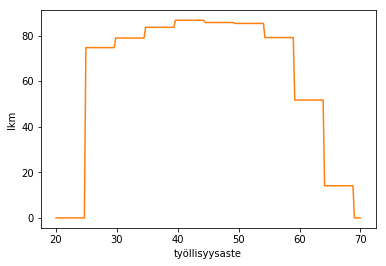

best_emp 0
Vaikutus työllisyyteen keskiarvo 0.0 htv, mediaani 0.0 htv
                        keskiarvo 0.0 työllistä, mediaani 0.0 työllistä


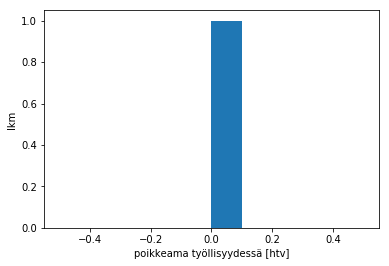

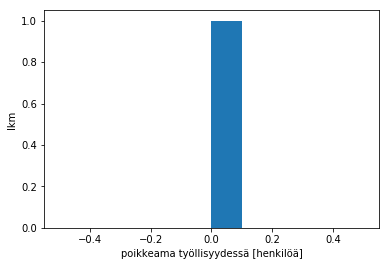

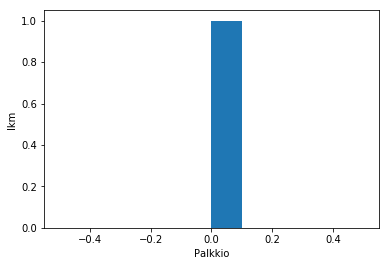

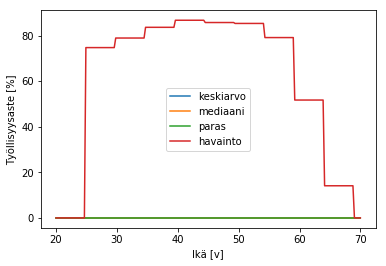

In [4]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,randomness=True,
              deterministic=False)
cc1.explain()
cc1.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch2,batch2=batch2,bestname='saved/best_perus',plot=True,
                save='saved/perusmalli')

# EK:n malli

Lasketaan vertailukelpoiset työllisyysasteet EK:n ehdottamalla mallilla. Mallissa on toteuttu muutoksia ansiosidonnaiseen työttömyysturvaan, asumistukeen, toimeentulotukeen ja verotukseen.

In [ ]:
cc2=Lifecycle(env='unemploymentEK-v1',minimal=False,mortality=mortality,perustulo=False,randomness=True)
cc2.run_results(debug=False,steps1=size1,steps2=size2,n=0,pop=pop_size,deterministic=deterministic,\
               train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best_ek',plot=True)

In [ ]:
#cc1.simulate(pop=10_000,deterministic=True,load='best/best_perus',rlmodel='acktr',save='perusmalli',modify_load=False)
#cc2.simulate(pop=10_000,deterministic=True,load='best/best_ek',rlmodel='acktr',save='eknmalli',modify_load=False)
cc2.compare_with(cc1)

# Verifiointi

Ajetaan sama simulaatio kaksi kertaa ja tarkastetaan että tulokset ovat sama. Tässä ideana on varmistaa, että satunnaisuus ei sotke tulosten arviointia.

# 300 vs 400 päivän kesto ansiosidonnaisessa

Mikä on alle kolmen vuoden työhistorian lyhyemmän (300 pv) ansiosidonnaisen päivärahan enimmäiskeston vaikutus työllisyyteen? Kokeillaan miten työllisyyteen vaikuttaisi sen pidentäminen 400 päivään.

In [ ]:
cc1_400=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=400,mortality=mortality,perustulo=False,randomness=True
cc1_400.run_results(debug=False,steps1=size1,steps2=size2,n=0,pop=pop_size,deterministic=deterministic,\
               train=True,predict=True,batch1=batch2,batch2=batch2,bestname='best_300pv',plot=True)
cc1_400.compare_with(cc1)

# Työssäoloehdon pituus 12 kk

Entä jos työssäoloehto olisikin 12 kuukautta pitkä nykyisen 6 kuukauden sijaan?

In [ ]:
cc1_toe=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_toe=1.0,mortality=mortality,perustulo=False,randomness=True
cc1_toe.run_results(debug=False,steps1=size1,steps2=size2,n=0,pop=pop_size,deterministic=deterministic,\
               train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best_12kk',plot=True)

In [ ]:
cc1_toe.compare_with(cc1)

# Ansiosidonnaisen päivärahan lyhennys 50 pv

Tarkastellaan, miten työllisyyteen vaikuttaisi ansiosidonnaisen päivärahan lyhentäminen 50 päivällä. Tällöin alle kolmen vuoden työhistorialla ansiosidonnaisen päivärahan enimmäiskesto olisi 250 pv ja pidemmällä työhistorialla enimmäiskesto olisi 350 pv.

In [ ]:
cc1_350=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=250,ansiopvraha_kesto400=350,mortality=mortality,perustulo=False,randomness=True
cc1_350.run_results(debug=False,steps1=size1,steps2=size2,n=0,pop=pop_size,deterministic=deterministic,\
               train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best_50pv',plot=True)

In [ ]:
cc1_350.compare_with(cc1)

# Työttömyysputken poisto

Työttömyysputki on suosittu elinkaarimalleissa. Tarkastellaan millainen työllisyysvaikutus on putken poistamisella.

In [ ]:
cc1_putki=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=True
cc1_putki.run_results(debug=False,steps1=size1,steps2=size2,n=0,pop=pop_size,deterministic=deterministic,\
               train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best_putki',plot=True)
cc1_putki.compare_with(cc1)                    

# Perustulo

In [ ]:
cc1_pt=Lifecycle(env='unemployment-v1',minimal=False,perustulo=True,mortality=mortality,randomness=True
cc1_pt.run_results(debug=False,steps1=size1,steps2=size2,n=0,pop=pop_size,deterministic=deterministic,\
               train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best_pt',plot=True)

In [ ]:
cc1_pt.compare_with(cc1)